In [21]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import shap

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier,Pool

from sklearn.metrics import accuracy_score

from sklearn.inspection import permutation_importance

In [22]:
# Generate synthetic classification data

X,y = make_classification(
    n_samples=1000,
    n_features=10,
    random_state=42 
    )

In [23]:
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

In [24]:
print(feature_names)

['Feature 0', 'Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9']


In [25]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [26]:
# Initialize CatBoost model

catboost_model = CatBoostClassifier(
    iterations=200, 
    depth=4, 
    learning_rate=0.01, 
    verbose=0, 
    random_state=42
    )

In [27]:
# Train CatBoost model

catboost_model.fit(X_train,y_train)

In [28]:
# Predict with the model

y_pred = catboost_model.predict(X_test)

In [29]:
# Evaluating the model

accuracy = accuracy_score(y_test,y_pred)

print(f'Accuracy : {accuracy:.4f}')

Accuracy : 0.8800


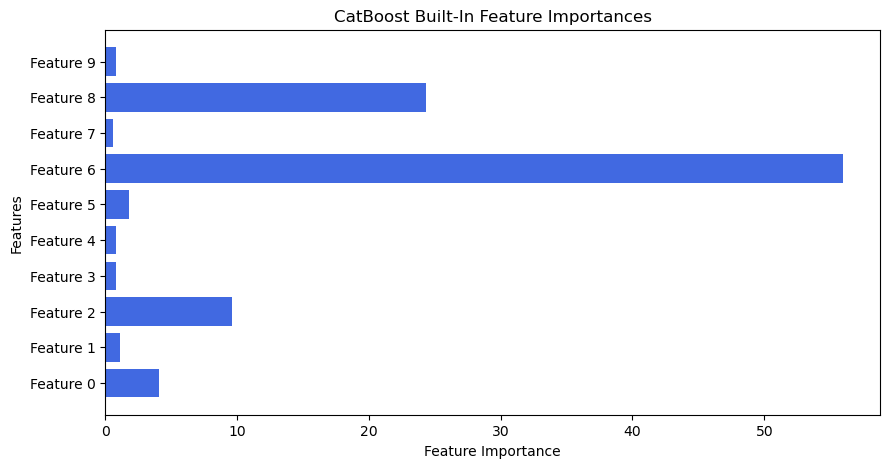

In [30]:
# Step 1: CatBoost Built-in Feature Importance

feature_importance = catboost_model.get_feature_importance()

plt.figure(figsize=(10,5))

plt.barh(feature_names, feature_importance, color='royalblue')

plt.xlabel('Feature Importance')

plt.ylabel('Features')

plt.title('CatBoost Built-In Feature Importances')

plt.show()

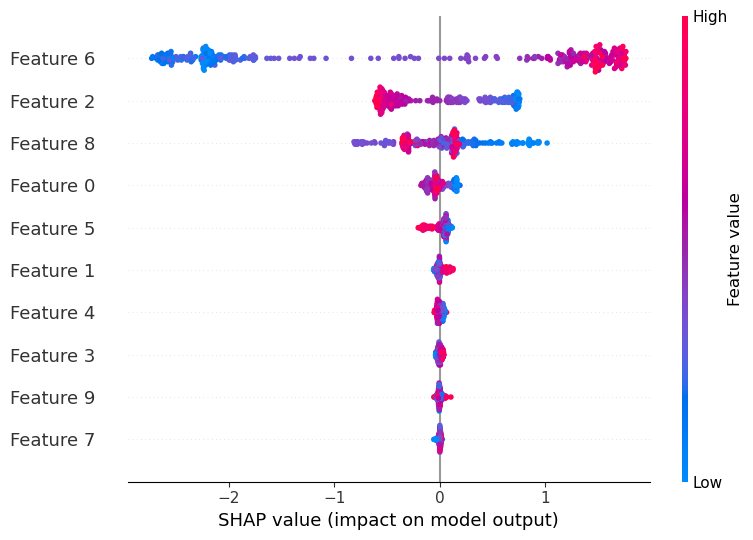

In [31]:
# Step 2: SHAP for CatBoost

explainer = shap.Explainer(catboost_model,X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=feature_names)

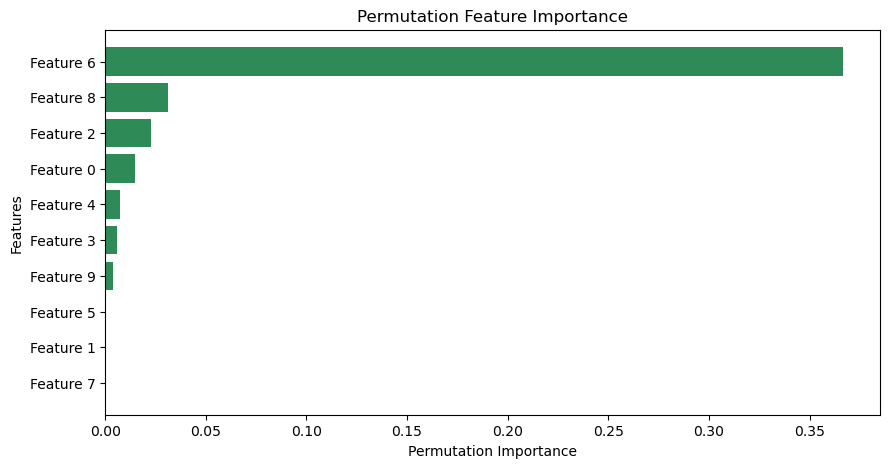

In [33]:
# Step 3: Permutation Importance

perm_importance = permutation_importance(catboost_model, X_test, y_test, scoring='accuracy')

perm_sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(10,5))

plt.barh(np.array(feature_names)[perm_sorted_idx],perm_importance.importances_mean[perm_sorted_idx], color='seagreen')

plt.xlabel('Permutation Importance')

plt.ylabel('Features')

plt.title('Permutation Feature Importance')

plt.show()